In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ticker = ["CHFJPY=X"]
start_date="2022-01-01"
end_date="2024-08-31"
data=yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,CHFJPY=X,CHFJPY=X,CHFJPY=X,CHFJPY=X,CHFJPY=X,CHFJPY=X
Date,,,,,,
2022-01-03 00:00:00+00:00,126.234001,126.234001,126.318329,125.340912,126.225998,0
2022-01-04 00:00:00+00:00,125.571266,125.571266,127.055885,125.541000,125.558998,0
2022-01-05 00:00:00+00:00,126.787003,126.787003,126.812347,126.330345,126.775803,0
2022-01-06 00:00:00+00:00,126.570999,126.570999,126.588997,125.754425,126.557999,0
2022-01-07 00:00:00+00:00,125.733002,125.733002,125.883003,125.454002,125.745003,0


## Momentum Strategy

In [8]:
data["Signal"] = 0
#window = 20
data["momentum"] = data["Adj Close"].iloc[:,0].diff(20) 

data.loc[data["momentum"] > 0, "Signal"] = 1
data.loc[data["momentum"] < 0, "Signal"] = -1


In [10]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,Signal,momentum,position
Ticker,CHFJPY=X,CHFJPY=X,CHFJPY=X,CHFJPY=X,CHFJPY=X,CHFJPY=X,,,
Date,,,,,,,,,
2024-08-26 00:00:00+00:00,169.929001,169.929001,170.522003,169.576004,169.929001,0,-1,-4.337997,-1.488998
2024-08-27 00:00:00+00:00,170.574005,170.574005,171.303864,170.572998,170.579712,0,-1,-3.013000,1.324997
2024-08-28 00:00:00+00:00,171.052917,171.052917,171.667007,170.983002,171.052917,0,-1,-1.924088,1.088913
2024-08-29 00:00:00+00:00,171.569824,171.569824,172.255890,170.889008,171.569824,0,1,1.066818,2.990906
2024-08-30 00:00:00+00:00,171.056641,171.056641,171.829559,170.751251,171.056641,0,1,0.140640,-0.926178


# Visualize the strategy

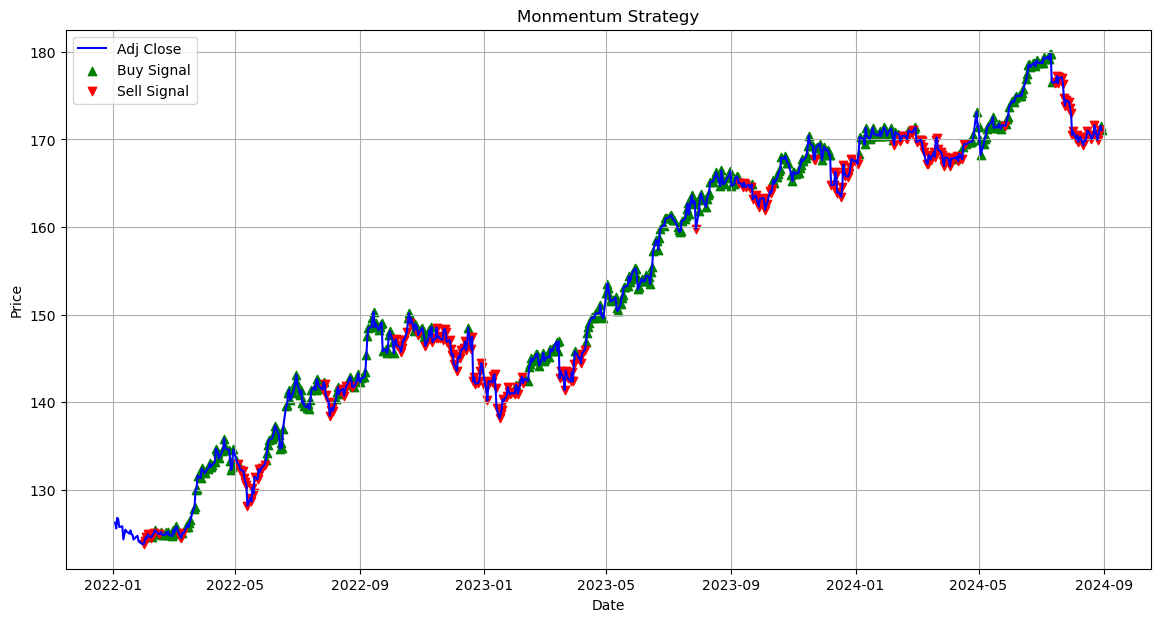

In [13]:
plt.figure(figsize=(14,7))
plt.plot(data.index, data["Adj Close"].iloc[:,0], label = "Adj Close", color = "blue")

buy_signals = data[data["Signal"] == 1]
sell_signals = data[data["Signal"] == -1]

plt.scatter(buy_signals.index, buy_signals["Adj Close"].iloc[:,0], marker = "^", color="green", label="Buy Signal", alpha=1)
plt.scatter(sell_signals.index, sell_signals["Adj Close"].iloc[:,0], marker = "v", color="red", label="Sell Signal", alpha=1)

plt.title("Monmentum Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## Backtesting - cummulative return

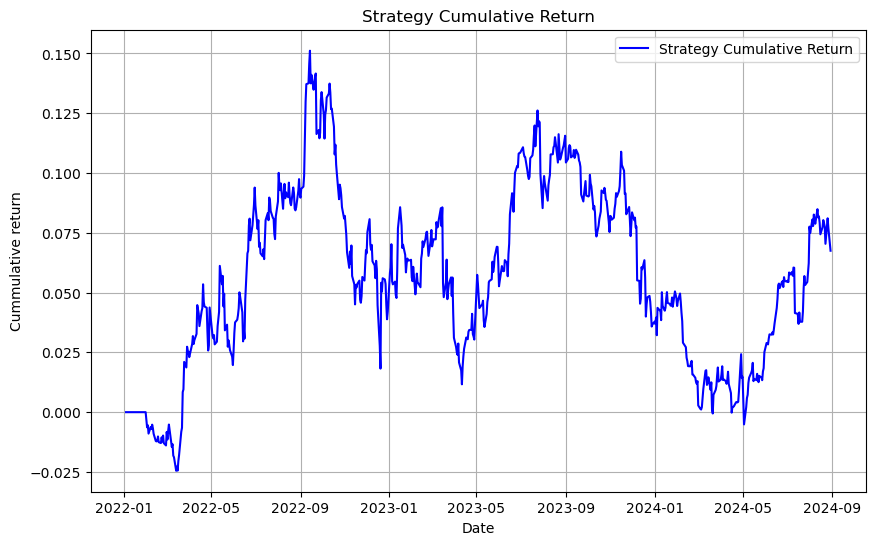

In [16]:
data["Daily_Return"]=np.log(data["Adj Close"].iloc[:,0]/data["Adj Close"].iloc[:,0].shift(1))

data["Strategy_Return"]=data["Daily_Return"]*data["Signal"].shift(1)

data["Cummulative_Return"]=(1+data["Strategy_Return"]).cumprod() - 1

plt.figure(figsize=(10,6))
plt.plot(data.index, data["Cummulative_Return"], label="Strategy Cumulative Return", color="blue")
plt.title("Strategy Cumulative Return")
plt.xlabel("Date")
plt.ylabel("Cummulative return")
plt.legend()
plt.grid()
plt.show()

## Metric to evaluate strategy performance

In [32]:
# calculate annulized return
trading_days = 252
annualized_return = data["Strategy_Return"].mean() * trading_days
print(f"Annualized Return: {annualized_return: .2f}")

# calculate annulized volatility
annualized_vol = data["Strategy_Return"].std() * np.sqrt(trading_days)
print(f"Annualized volatility: {annualized_vol: .2f}")

# calculate Sharpe Ratio
Sharpe_Ratio = annualized_return / annualized_vol
print(f"Sharpe ratio: {Sharpe_Ratio: .2f}")

# calculate maximum drawndown
data["cummulative_return_max"] = data["Cummulative_Return"].cummax()
drawdown = (data["Cummulative_Return"] - data["cummulative_return_max"])/data["cummulative_return_max"]
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown: .2%}")

Annualized Return: -0.00
Annualized volatility:  0.08
Sharpe ratio: -0.06
Maximum Drawdown: -2733.85%
